## Descriptive Statistics

We calculated summary statistics to understand the overall distribution of numerical and categorical variables in the dataset.

Key metrics:
- **Mean**: Average value
- **Standard Deviation (std)**: How many values vary from the mean
- **Min/Max**: Range of the feature values
- **25%, 50%, 75%**: Quartiles that help detect skewed distributions

Example insights:
- The **average age** of clients is around mid-30s, with a wide spread.
- **Credit limits** vary significantly, which might impact risk.
- **Categorical values** like gender, education, and marital status were already cleaned for clarity.

These insights give us a strong baseline understanding before performing hypothesis testing.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("images", exist_ok=True)

In [2]:
df = pd.read_csv("../data/inputs/cleaned/cleaned_credit_data.csv")
df.head()

,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,...,bill_amount_jun,bill_amount_may,bill_amount_apr,payment_amount_sep,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.describe(include="object")

,sex,education,marriage
count,30000,29986,29946
unique,2,5,3
top,female,university,single
freq,18112,14030,15964


In [3]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_delay_sep,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_delay_aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_delay_jul,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_delay_jun,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_delay_may,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
pay_delay_apr,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
bill_amount_sep,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_amount_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


## Hypothesis Testing

We performed two basic hypothesis tests to evaluate if selected features are statistically associated with the target variable `default`.


###  1. Chi-Square Test: Gender vs Default Status

- **Purpose**: Test whether gender and default behavior are independent.
- **Test type**: Chi-square test of independence
- **Null hypothesis (H₀)**: Gender and default payment status are independent (no association).
- **Alternative hypothesis (H₁)**: Gender and default payment status are not independent (there is an association).


###  2. Mann-Whitney U Test: Age vs Default Status

- **Purpose**: Test whether age distribution differs between defaulted and non-defaulted clients.
- **Test type**: Mann-Whitney U test (non-parametric)
- **Null hypothesis (H₀)**: The age distribution is the same for both groups.
- **Alternative hypothesis (H₁)**: The age distribution is different for the two groups.


## Chi-square test (Gender vs Default)

In [8]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['default'])

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

Chi-squared statistic: 47.71
P-value: 0.0000


**Results**:
- Chi-squared statistic: **47.71**
- P-value: **0.0000**

**Conclusion**:
- Since the p-value is **less than 0.05**, we **reject the null hypothesis**.
- This suggests a **significant association** between gender and likelihood of default.



## Mann-Whitney U test (Age vs Default)

In [9]:
from scipy.stats import mannwhitneyu

# Split age by default status
age_default_0 = df[df["default"] == 0]["age"]
age_default_1 = df[df["default"] == 1]["age"]

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(age_default_0, age_default_1)

print(f"Mann-Whitney U statistic: {stat:.2f}")
print(f"P-value: {p:.4f}")

Mann-Whitney U statistic: 76966879.50
P-value: 0.3725


**Results**:
- Mann-Whitney U statistic: **76,966,879.50**
- P-value: **0.3725**

**Conclusion**:
- Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**.
- There is **no significant difference** in age distribution between clients who defaulted and those who did not.

###  Interpretation Summary

- **Gender** is **statistically significant** in relation to default behavior.
- **Age** does **not show significant differences** between groups and may have **limited predictive power** on its own.

These results help us select which variables might be more informative for future modeling.

## Skewness & Outliers Analysis

We analysed the skewness of numeric features to detect imbalance:

- Features like `limit_bal` and `pay_delay_sep` showed strong right skew
- Right skew means most values are low, but a few are very high
- Skewed features may benefit from transformation (e.g. log scaling)

We also used histograms to visually inspect skew and potential outliers, helping us prepare for better model performance.


In [4]:
# Check skewness for numeric features
df.skew(numeric_only=True).sort_values(ascending=False)

payment_amount_aug    30.453817
payment_amount_jul    17.216635
payment_amount_sep    14.668364
payment_amount_jun    12.904985
payment_amount_may    11.127417
payment_amount_apr    10.640727
bill_amount_jul        3.087830
bill_amount_may        2.876380
bill_amount_apr        2.846645
bill_amount_jun        2.821965
bill_amount_aug        2.705221
bill_amount_sep        2.663861
default                1.343504
pay_delay_may          1.008197
pay_delay_jun          0.999629
limit_bal              0.992867
pay_delay_apr          0.948029
pay_delay_jul          0.840682
pay_delay_aug          0.790565
age                    0.732246
pay_delay_sep          0.731975
dtype: float64

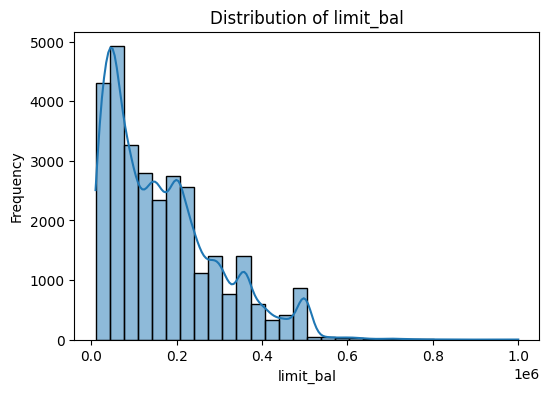

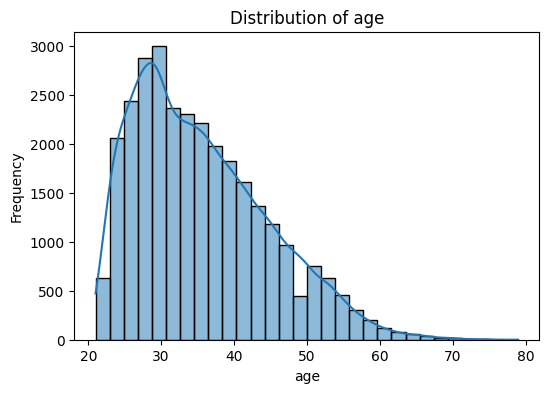

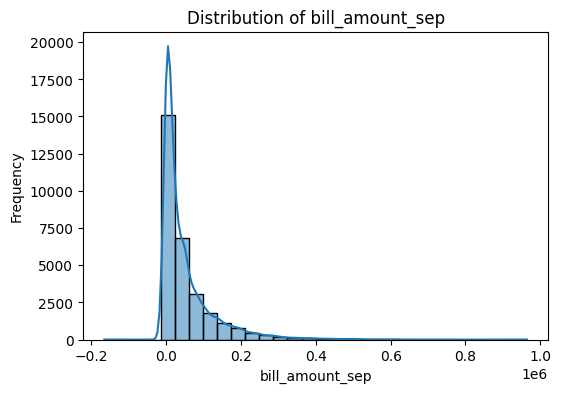

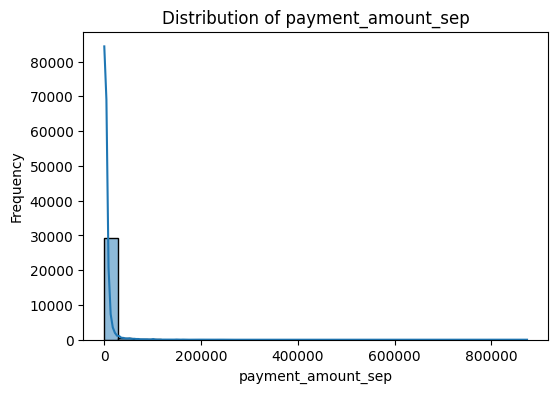

In [6]:
# Features with high skewness
skewed_features = ["limit_bal", "age", "bill_amount_sep", "payment_amount_sep"]

for feature in skewed_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.savefig(f"images/{feature}_distribution.png")
    plt.show()

## Feature Engineering 

In this step, we created new features based on bill, payment data, repayment behavior and credit usage :

- **total_bill_amount**: Represents the total amount billed over 6 months.
- **total_pay_amount**: Represents the total amount paid over 6 months.
- **pay_to_bill_ratio**: Measures the ratio between payments and billed amounts, indicating repayment behavior.
- **payment_delay_count**: Number of months the customer delayed payments.
- **high_utilization**: 1 if customer used more than 80% of their credit limit in any billing month.
- **avg_payment_delay**: Average repayment delay (from PAY_0 to PAY_6).
- **has_ever_paid_on_time**: 1 if the customer paid on time in at least one month.

These engineered features give deeper insight into risk patterns and credit behavior, supporting better prediction of defaults.


In [12]:
# Feature 1: Total bill amount over 6 months
df["total_bill_amount"] = df[["bill_amount_sep", "bill_amount_aug", "bill_amount_jul",
                              "bill_amount_jun", "bill_amount_may", "bill_amount_apr"]].sum(axis=1)

# Feature 2: Total payment amount over 6 months
df["total_payment_amount"] = df[["payment_amount_sep", "payment_amount_aug", "payment_amount_jul",
                                  "payment_amount_jun", "payment_amount_may", "payment_amount_apr"]].sum(axis=1)

# Feature 3: Ratio of total payment to total bill
df["payment_to_bill_ratio"] = df["total_payment_amount"] / df["total_bill_amount"]
df["payment_to_bill_ratio"] = df["payment_to_bill_ratio"].fillna(0).replace([np.inf, -np.inf], 0)

# Feature 4: COunt of months with payment delays
pays_cols = ["pay_delay_sep", "pay_delay_aug", "pay_delay_jul",
             "pay_delay_jun", "pay_delay_may", "pay_delay_apr"]
df["payment_delay_count"] = df[pays_cols].apply(lambda row: (row > 0).sum(), axis=1)

# Feature 5: High credit utilization flag (used > 80% of limit in any month)
bill_cols = ["bill_amount_sep", "bill_amount_aug", "bill_amount_jul",
             "bill_amount_jun", "bill_amount_may", "bill_amount_apr"]
df["high_utilization"] = df[bill_cols].gt(df["limit_bal"] * 0.8, axis=0).any(axis=1).astype(int)

# Feature 6: Avarage payment delay
df["avg_payment_delay"] = df[pays_cols].mean(axis=1)

# Feature 7: Has ever paid on time
df["has_ever_paid_on_time"] = df[pays_cols].eq(-1).any(axis=1).astype(int)

In [13]:
df.head()

,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,...,payment_amount_may,payment_amount_apr,default,total_bill_amount,total_payment_amount,payment_to_bill_ratio,payment_delay_count,high_utilization,avg_payment_delay,has_ever_paid_on_time
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,1,7704.0,689.0,0.089434,2,0,-0.333333,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,0.0,2000.0,1,17077.0,5000.0,0.292791,2,0,0.500000,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,1000.0,5000.0,0,101653.0,11018.0,0.108388,0,0,0.000000,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,1069.0,1000.0,0,231334.0,8388.0,0.036259,0,1,0.000000,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,689.0,679.0,0,109339.0,59049.0,0.540054,0,0,-0.333333,1
